# Sestup po gradientu
Sestup po gradientu nebo také též **gradientní sestup** je algoritmus pro nalezení optima diferencovatelné reálné funkce často využívaný ve strojovém učení a umělé inteligenci pro **snížení hodnoty ztrátové funkce** (*tj. loss function*).

## Princip funkčnosti
Sestup po gradientu využívá vlastnosti **gradientu funkce**. K nalezení minima se iterativně pohybujeme proti směru daného vektoru a po krocích určité délky. Tímto způsobem se pohybujeme v ideálním směru nejvyššího klesání funkce.

## Gradient funkce
Gradient funkce je diferenciální operátor, který funkci $f$ přiřadí vektor $v$ směřující k nejvyššímu růstu funkce, gradient značíme $\nabla f$. Gradient vypočteme jako

$$\nabla f(x_1, ..., x_n) = \sum_{i=1}^{n} \frac{\partial f}{\partial x_i} E_i$$

, kde $E_i$ je *i-tý* člen kanonické báze vektorového prostoru $R^n$.



## Příklad výpočtu gradientu
Cíl: Vypočíst gradient funkce:
$$f(x,y) = 3x^2 + 5y^3$$

$$\nabla f(x,y) = \frac{\partial f}{\partial x} (1,0) + \frac{\partial f}{\partial y}(0,1) = (6x, 15y^2)$$

Skalární pole $(6x, 15y^2)$ popisuje nejvyšší změny ve všech bodech spojitosti $f.$

## Sestup po funkci $f(x) = 4x^2$
Pomocí metody sestupu po gradientu nalezneme minimum reálné funkce $f(x) = 4x^2$. Gradientem dané funkce je:
$$\nabla f = (8x, 0)$$
Budeme tedy sestupovat posloupností danou vztahem:
$$ a_{n+1} = a_n - \gamma \nabla f $$

s parametrem $\gamma$ a vždy se posuneme na hodnotu $f(a_{n+1})$.

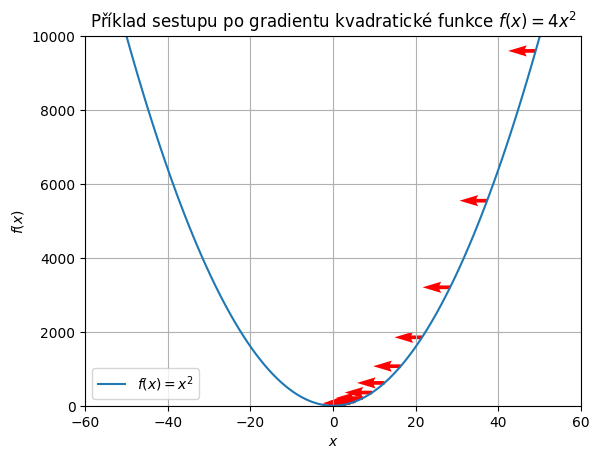

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Naše funkce
def f(x):
  return 4*(x*x)

#Použijeme gradient
def get_next_a_n(point):
  return np.array([8*point[0], 0])

def move_to_next_point(a_n, vector, gamma):
  a_n[0] = a_n[0] - (gamma * vector[0])
  a_n[1] = f(a_n[0])
  return a_n

def gradient_descend_vector_plot(iterations, a_1, gamma):
  a_n = a_1
  for i in range(iterations):
    gradient_val = get_next_a_n(a_1)
    plt.quiver(a_n[0], a_n[1], -gradient_val[0], gradient_val[1], color="red")
    a_n = move_to_next_point(a_n, gradient_val, gamma)
    #print("Iteration: " + str(iterations) + ", a_n = " + str(a_n))

gamma = 0.03

x = np.linspace(-50, 50, 100)
y = f(x)

#Bod, kdy začínáme se sestupem
a1_x = math.floor(np.random.uniform(-50, 50, 1))
a1_y = y[abs(a1_x) + 49]

a1 = np.array([a1_x, a1_y])

gradient_descend_vector_plot(10, a1, gamma)
plt.plot(x, y, label="$f(x)=x^2$")
plt.grid()
plt.legend()
plt.title("Příklad sestupu po gradientu kvadratické funkce $f(x) = 4x^2$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim((-60, 60))
plt.ylim((0, 10e3))

plt.show()

## Sestup po gradientu ztrátové funkce RME
Ztrátová funkce RME (round mean error) je funkce využívaná ve strojovém učení k minimalizaci